## First EDA from crime data in Mexico City

This notebook will be an initial approach to get some insights from the more than 1M rows obtained from public data from Mexico City reported crimes

In [2]:
import pandas as pd
import zipfile
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#Path
#Insert your local repo path to file da_victimas_completa_marzo_2023.zip
csv_path = "D:\Archivos\Social Data Challenge\sdc-security\datasets\da_victimas_completa_marzo_2023.zip"

In [4]:
zf = zipfile.ZipFile(csv_path) 
df_raw= pd.read_csv(zf.open('da_victimas_completa_marzo_2023.csv'))


In [5]:
df_raw.head()

,idCarpeta,Año_inicio,Mes_inicio,FechaInicio,Delito,Categoria,Sexo,Edad,TipoPersona,CalidadJuridica,...,Mes_hecho,FechaHecho,HoraHecho,HoraInicio,alcaldia_hechos,municipio_hechos,colonia_datos,fgj_colonia_registro,latitud,longitud
0,8324429.0,2019,Enero,2019-01-04,FRAUDE,DELITO DE BAJO IMPACTO,Masculino,62.0,FISICA,OFENDIDO,...,Agosto,2018-08-29,12:00:00,12:19:00,ALVARO OBREGON,NaN,GUADALUPE INN,GUADALUPE INN,19.36125,-99.18314
1,8324430.0,2019,Enero,2019-01-04,"PRODUCCIÓN, IMPRESIÓN, ENAJENACIÓN, DISTRIBUCI...",DELITO DE BAJO IMPACTO,Femenino,38.0,FISICA,VICTIMA Y DENUNCIANTE,...,Diciembre,2018-12-15,15:00:00,12:20:00,AZCAPOTZALCO,NaN,VICTORIA DE LAS DEMOCRACIAS,VICTORIA DE LAS DEMOCRACIAS,19.47181,-99.16458
2,8324431.0,2019,Enero,2019-01-04,ROBO A TRANSEUNTE SALIENDO DEL BANCO CON VIOLE...,ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON ...,Masculino,42.0,FISICA,VICTIMA Y DENUNCIANTE,...,Diciembre,2018-12-22,15:30:00,12:23:00,COYOACAN,NaN,COPILCO EL BAJO,COPILCO UNIVERSIDAD ISSSTE,19.33797,-99.18611
3,8324435.0,2019,Enero,2019-01-04,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,Masculino,35.0,FISICA,VICTIMA Y DENUNCIANTE,...,Enero,2019-01-04,06:00:00,12:27:00,IZTACALCO,NaN,PANTITLAN V,AGRÍCOLA PANTITLAN,19.40327,-99.05983
4,8324438.0,2019,Enero,2019-01-04,ROBO DE MOTOCICLETA SIN VIOLENCIA,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,Masculino,NaN,FISICA,VICTIMA,...,Enero,2019-01-03,20:00:00,12:35:00,IZTAPALAPA,NaN,LAS AMERICAS (U HAB),PROGRESISTA,19.35480,-99.06324


In [12]:
#Change column names
df_raw.rename(columns = lambda x : x.lower() , inplace = True)
df_raw.columns = df_raw.columns.str.replace('ñ', 'ni')
df_raw.rename(columns = {"latitud":"crimen_lat", "longitud":"crimen_lon"} , inplace = True)
#del df_raw['municipio_hechos']

columns_to_dropna = df_raw.columns.drop('edad')
df = df_raw.dropna(subset = columns_to_dropna).copy()

print('Original crime dataset shape is: {}'.format(df_raw.shape))
print('The shape of the new crime dataset without null values is: {}'.format(df.shape))

df["idcarpeta"]  = df["idcarpeta"].round().astype(int)
df["anio_hecho"] = df["anio_hecho"].round().astype(int)
df["idcarpeta"]  = df["idcarpeta"].round().astype(int)

average              = df['edad'].mean()
df["edad"]       = df["edad"].fillna(average)
df["edad"]       = df["edad"].round().astype(int)

df.head()

Original crime dataset shape is: (1038430, 21)
The shape of the new crime dataset without null values is: (784813, 21)


,idcarpeta,anio_inicio,mes_inicio,fechainicio,delito,categoria,sexo,edad,tipopersona,calidadjuridica,...,anio_hecho,mes_hecho,fechahecho,horahecho,horainicio,alcaldia_hechos,colonia_datos,fgj_colonia_registro,crimen_lat,crimen_lon
0,8324429,2019,Enero,2019-01-04,FRAUDE,DELITO DE BAJO IMPACTO,Masculino,62,FISICA,OFENDIDO,...,2018,Agosto,2018-08-29,12:00:00,12:19:00,ALVARO OBREGON,GUADALUPE INN,GUADALUPE INN,19.36125,-99.18314
1,8324430,2019,Enero,2019-01-04,"PRODUCCIÓN, IMPRESIÓN, ENAJENACIÓN, DISTRIBUCI...",DELITO DE BAJO IMPACTO,Femenino,38,FISICA,VICTIMA Y DENUNCIANTE,...,2018,Diciembre,2018-12-15,15:00:00,12:20:00,AZCAPOTZALCO,VICTORIA DE LAS DEMOCRACIAS,VICTORIA DE LAS DEMOCRACIAS,19.47181,-99.16458
2,8324431,2019,Enero,2019-01-04,ROBO A TRANSEUNTE SALIENDO DEL BANCO CON VIOLE...,ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON ...,Masculino,42,FISICA,VICTIMA Y DENUNCIANTE,...,2018,Diciembre,2018-12-22,15:30:00,12:23:00,COYOACAN,COPILCO EL BAJO,COPILCO UNIVERSIDAD ISSSTE,19.33797,-99.18611
3,8324435,2019,Enero,2019-01-04,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,Masculino,35,FISICA,VICTIMA Y DENUNCIANTE,...,2019,Enero,2019-01-04,06:00:00,12:27:00,IZTACALCO,PANTITLAN V,AGRÍCOLA PANTITLAN,19.40327,-99.05983
4,8324438,2019,Enero,2019-01-04,ROBO DE MOTOCICLETA SIN VIOLENCIA,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,Masculino,39,FISICA,VICTIMA,...,2019,Enero,2019-01-03,20:00:00,12:35:00,IZTAPALAPA,LAS AMERICAS (U HAB),PROGRESISTA,19.35480,-99.06324


### Values exploration

First step is taking a look of what columns are present on the dataset and how many different values are contained on those columns. 

In [108]:
df.columns

Index(['idcarpeta', 'anio_inicio', 'mes_inicio', 'fechainicio', 'delito',
       'categoria', 'sexo', 'edad', 'tipopersona', 'calidadjuridica',
       'competencia', 'anio_hecho', 'mes_hecho', 'fechahecho', 'horahecho',
       'horainicio', 'alcaldia_hechos', 'colonia_datos',
       'fgj_colonia_registro', 'crimen_lat', 'crimen_lon'],
      dtype='object')

In [15]:
print("Shape of dataset: {}\n".format(df.shape))

#Checking different values
print("Different 'Año_inicio' column values: {}\n".format(df.anio_inicio.unique()))
print("Different 'Mes_inicio' column values: {}\n'".format(df.mes_inicio.unique()))

print("Count of different 'Delito' column values: {}\n".format(df.delito.unique().size))

delitos = df.delito.unique()
#print("Different 'Delito' column values: {}".format(df.Delito.unique()))

Shape of dataset: (784813, 21)

Different 'Año_inicio' column values: [2019 2020 2021 2022 2023]

Different 'Mes_inicio' column values: ['Enero' 'Junio' 'Abril' 'Mayo' 'Febrero' 'Marzo' 'Septiembre' 'Julio'
 'Octubre' 'Agosto' 'Diciembre' 'Noviembre']
'
Count of different 'Delito' column values: 305



In [18]:
delitos_list = df.delito.unique()
print("Different 'Delito' column values: {}\n".format(delitos_list.size))


Different 'Delito' column values: 305



## 'Delito' Category: Robo

The 'Delito' (Spanish word from crime) column has 310 different values. Most of them are Robo ('Steal') crimes. How many different 'Robo' categories there are and how many occurrences are there available in the dataset?

In [23]:
df_robos = df[df['delito'].str.contains("ROBO")]
number_robo = df_robos.shape[0]
number_no_robo = int(df.shape[0]) - df_robos.shape[0] 
print('Number of records related with robo: ',number_robo)
print('Number of records not related with robo: ',number_no_robo)

print("Types of 'Robo (Steal)' crimes category in dataset: {}\n".format(df_robos.delito.unique().size))



Number of records related with robo:  265713
Number of records not related with robo:  519100
Types of 'Robo (Steal)' crimes category in dataset: 112



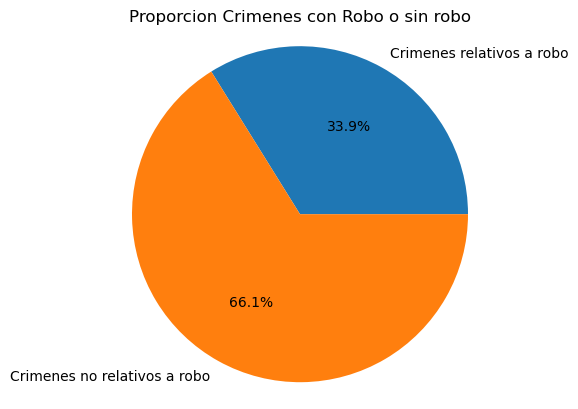

In [24]:
plt.pie([number_robo, number_no_robo], labels=['Crimenes relativos a robo', 'Crimenes no relativos a robo'], autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.title('Proporcion Crimenes con Robo o sin robo')
plt.show()

In [22]:
robos_list = df_robos.delito.unique()

In [30]:
df_robos2 = df_robos.groupby(['delito']).size()\
                .sort_values(ascending=False)\
                .reset_index(name='count')

In [11]:
df_robos2.head(50)

,Delito,count
0,ROBO DE OBJETOS,52811
1,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,44793
2,ROBO DE ACCESORIOS DE AUTO,35225
3,ROBO A NEGOCIO SIN VIOLENCIA,31547
4,ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,26940
5,ROBO A NEGOCIO CON VIOLENCIA,22155
6,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,19422
7,ROBO A NEGOCIO SIN VIOLENCIA POR FARDEROS (TIE...,16965
8,ROBO A CASA HABITACION SIN VIOLENCIA,16724
9,ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VI...,10631




**ROBO DE OBJETOS** is the most frequent crime category reported. This information suggests that an analysis focused only in steal crimes can be done so that different kinds of steal are analyzed or a specific type of steal is choosen. 

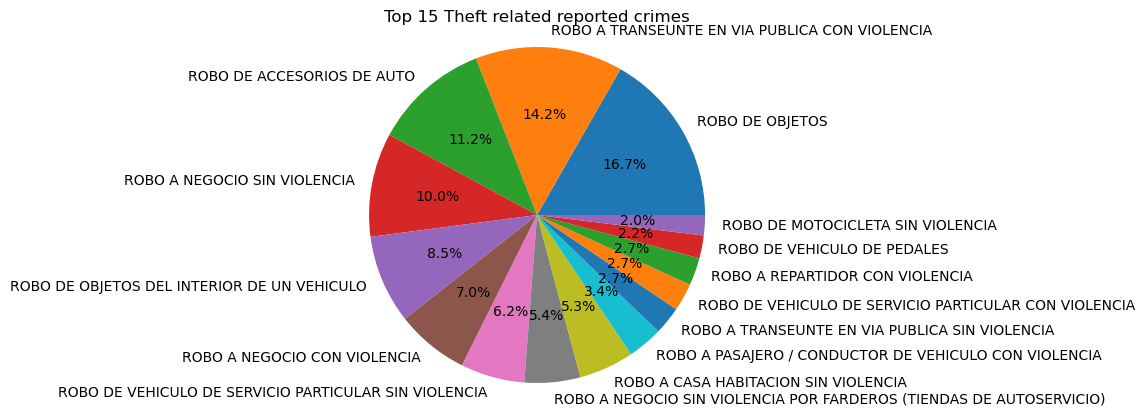

In [12]:
plt.pie(df_robos2.head(15)['count'], labels=df_robos2.head(15)['Delito'], autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.title('Top 15 Theft related reported crimes')
plt.show()

# Other kinds of 'Delito'

In [27]:
df_no_robos = df[~df['delito'].str.contains("ROBO")]

print("Types of crime categories in dataset without including theft: {}\n".format(df_no_robos.delito.unique().size))

Types of crime categories in dataset without including theft: 193



In [33]:
df_no_robos2 = df_no_robos.groupby(['delito']).size()\
                .sort_values(ascending=False)\
                .reset_index(name='count')

df_no_robos2.head(50)

,delito,count
0,VIOLENCIA FAMILIAR,136458
1,AMENAZAS,68386
2,FRAUDE,65434
3,DESPOJO,16745
4,USURPACIÓN DE IDENTIDAD,15756
5,ABUSO SEXUAL,14717
6,ABUSO DE CONFIANZA,13825
7,DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO V...,12158
8,LESIONES INTENCIONALES POR GOLPES,11722
9,"PRODUCCIÓN, IMPRESIÓN, ENAJENACIÓN, DISTRIBUCI...",11247


There is an overwhelming amount of crimes related to **'Violencia Familiar'**, with roughly 150k rows. This is impressive, since the 4th crime category (no related to theft) has only about 20k records. The following pie chart shows the distribution for the top 10 crime categories not related to theft.


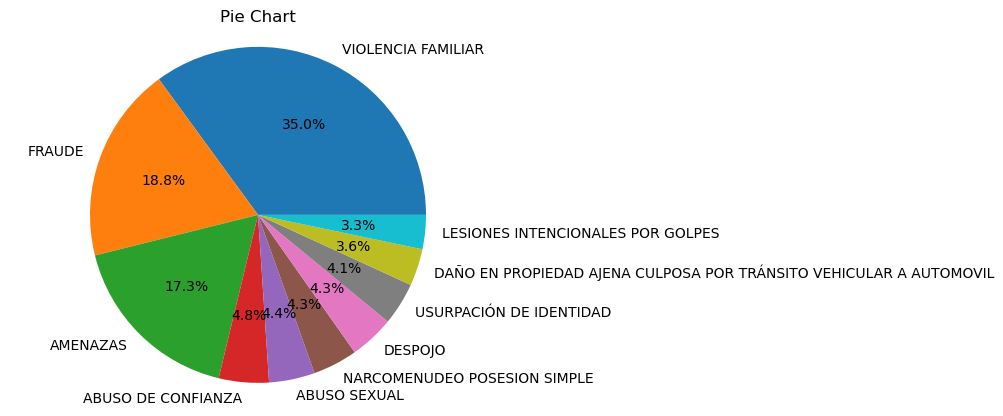

In [15]:
plt.pie(df_no_robos2.head(10)['count'], labels=df_no_robos2.head(10)['Delito'], autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.title('Pie Chart')
plt.show()

## Revisiting Robos Records

In [22]:
categoria_robos = list(df_robos.Categoria.unique())

In [23]:
categoria_robos

['ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA',
 'ROBO DE VEHÍCULO CON Y SIN VIOLENCIA',
 'DELITO DE BAJO IMPACTO',
 'ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA',
 'ROBO A REPARTIDOR CON Y SIN VIOLENCIA',
 'ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA',
 'ROBO A NEGOCIO CON VIOLENCIA',
 'ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA',
 'ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA',
 'ROBO A CASA HABITACIÓN CON VIOLENCIA',
 'ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA',
 'VIOLACIÓN',
 'HECHO NO DELICTIVO']

In [26]:
categorias_sin_robo= list(df_no_robos.Categoria.unique())

In [27]:
categorias_sin_robo

['DELITO DE BAJO IMPACTO',
 'VIOLACIÓN',
 'LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO',
 'HECHO NO DELICTIVO',
 'HOMICIDIO DOLOSO',
 'SECUESTRO']

In [49]:
def pie(x,y):
    plt.pie(y, labels=x, autopct='%1.1f%%')
    plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.title('Pie Chart')
    plt.show()

In [47]:
df_chart = df_robos2
robo_violento    = df_chart.loc[df_chart ['delito'].str.contains('CON VIOLENCIA', case=False), 'count'].sum()
robo_no_violento = df_chart.loc[df_chart ['delito'].str.contains('SIN VIOLENCIA', case=False), 'count'].sum()
robo_otros = df_chart.loc[(~df_chart ['delito'].str.contains('CON VIOLENCIA', case=False)) & (~df_chart ['delito'].str.contains('SIN VIOLENCIA', case=False)), 'count'].sum()
violencia_fam = df_no_robos2.loc[ df_no_robos2['delito'].str.contains('VIOLENCIA FAMILIAR', case=False), 'count'].sum()
fraude = df_no_robos2.loc[ df_no_robos2['delito'].str.contains('FRAUDE', case=False), 'count'].sum()
amenazas = df_no_robos2.loc[ df_no_robos2['delito'].str.contains('AMENAZAS', case=False), 'count'].sum()


df2 = pd.DataFrame({'crimen':['robo violento','robo no violento' ,'robo_otros','violencia fam', 'fraude', 'amenazas'], 'cases': [robo_violento, robo_no_violento,robo_otros, violencia_fam,fraude, amenazas]})

In [48]:
df2

,crimen,cases
0,robo violento,89735
1,robo no violento,65434
2,robo_otros,110544
3,violencia fam,136458
4,fraude,65558
5,amenazas,68386


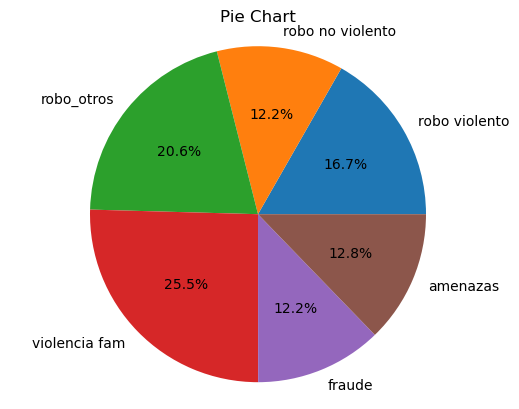

In [50]:
pie(df2['crimen'], df2['cases'])

In [52]:
!pip install seaborn


## Exploring datasets by alcaldia

In [152]:
df_alcaldia = df.groupby(['alcaldia_hechos','categoria','delito']).size().reset_index(name ='count').copy()
#df_alcaldia= df_alcaldia.sort_values(by = ['alcaldia_hechos','count'], ascending = [True, False])
df_alcaldia.head()
#.sort_values(by = ['alcaldia_hechos','count'], ascending = [True, False]).
#df_alcaldia.head()#loc(df_alcaldia["alcaldia_hechos"])

# df_robos2 = df_robos.groupby(['delito']).size()\
#                 .sort_values(ascending=False)\
#                 .reset_index(name='count')

,alcaldia_hechos,categoria,delito,count
0,ALVARO OBREGON,DELITO DE BAJO IMPACTO,ABORTO,20
1,ALVARO OBREGON,DELITO DE BAJO IMPACTO,ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA P...,475
2,ALVARO OBREGON,DELITO DE BAJO IMPACTO,ABUSO DE CONFIANZA,1037
3,ALVARO OBREGON,DELITO DE BAJO IMPACTO,ABUSO SEXUAL,1045
4,ALVARO OBREGON,DELITO DE BAJO IMPACTO,ACOSO SEXUAL,351


In [58]:
import seaborn as sns


In [197]:
def heatmap(heatmap_data,title,xlabel, ylabel):
    # Create the heatmap
    plt.figure(figsize=(20, 16))
    sns.heatmap(heatmap_data, annot=False, fmt='d', cmap='YlGnBu', linewidths=0.5, \
                xticklabels=[label[:35] + '...' if len(label) > 35 else label for label in heatmap_data.columns],
                yticklabels=[label[:35] + '...' if len(label) > 35 else label for label in heatmap_data.index])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

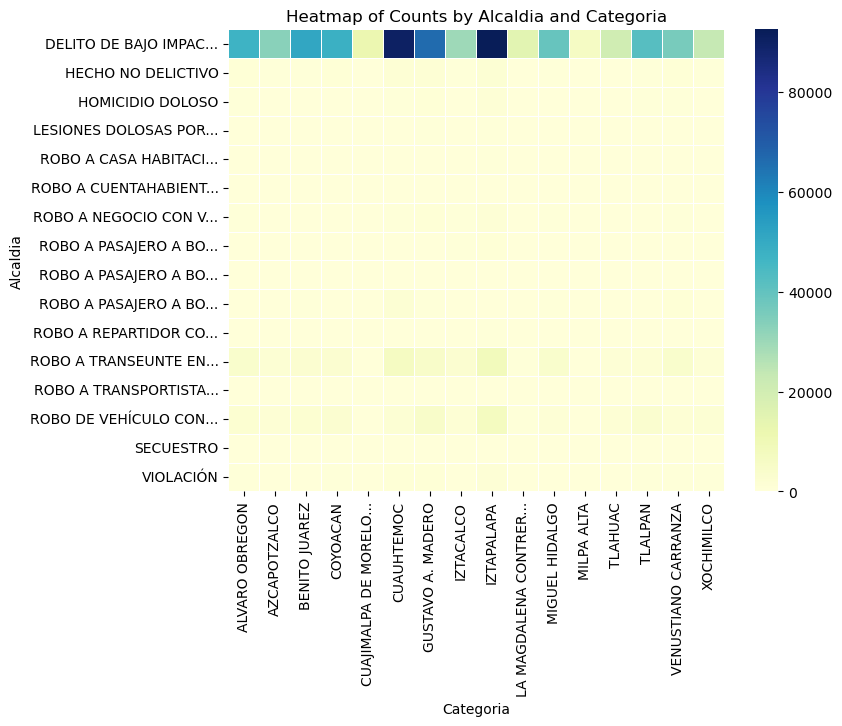

In [138]:
heatmap_data = df_alcaldia.pivot_table(index='categoria', columns='alcaldia_hechos', values='count', fill_value=0,aggfunc='sum')

#heatmap_data

heatmap(heatmap_data, 'Heatmap of Counts by Alcaldia and Categoria','Categoria','Alcaldia')



Delito de Bajo impacto contains a lot of crimes, so crimes with this category should be visualized in a separate heatmap or Scaling techniques shoud be used

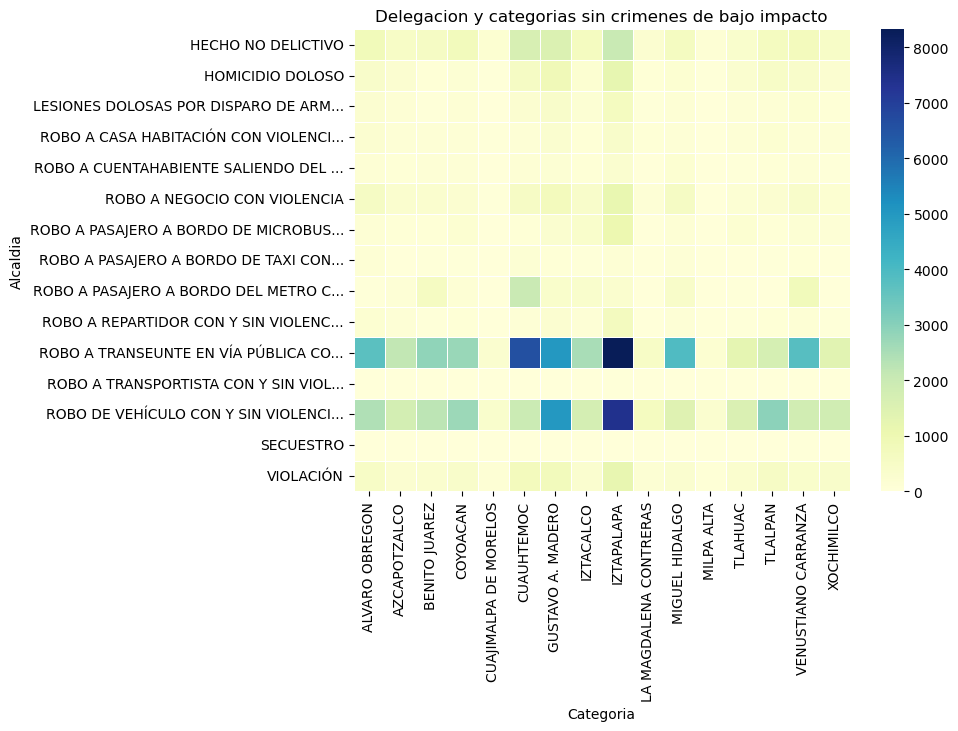

In [146]:
heatmap(heatmap_data.drop('DELITO DE BAJO IMPACTO'),'Delegacion y categorias sin crimenes de bajo impacto', 'Categoria','Alcaldia')


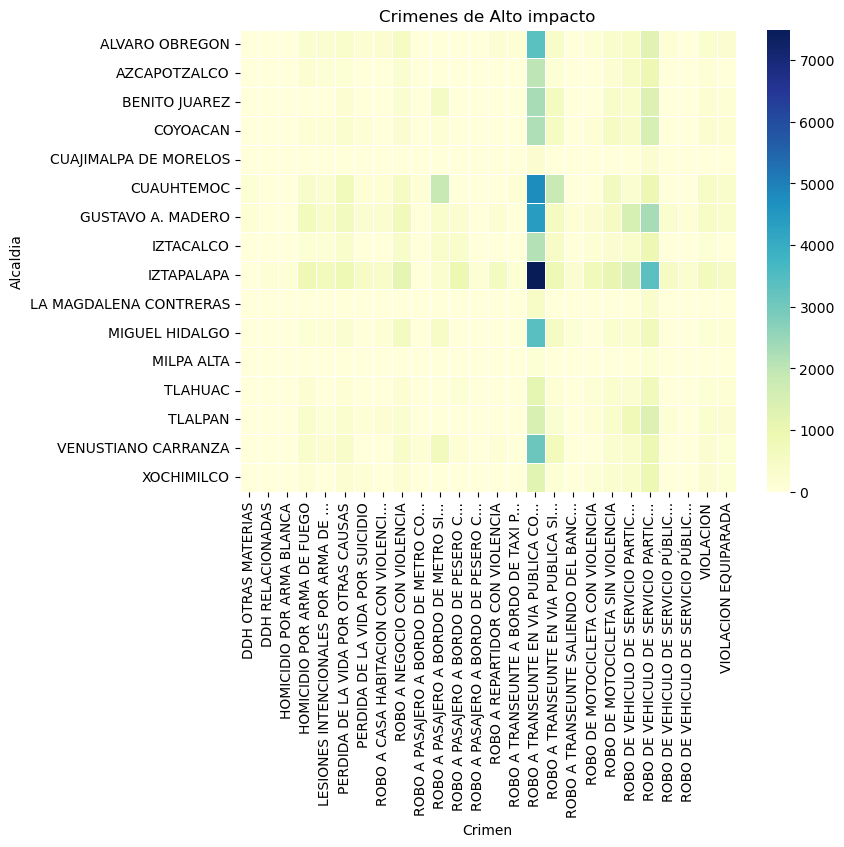

In [181]:
df_alto_impacto = df_alcaldia[df_alcaldia['categoria'] !='DELITO DE BAJO IMPACTO']
df_alto_impacto_sub= df_alto_impacto.sort_values(by='count', ascending=False).head(200)
#df_bajo_impacto_40
heatmap_data = df_alto_impacto_sub.pivot_table(index='alcaldia_hechos', columns='delito', values='count', fill_value=0,aggfunc='sum')

heatmap(heatmap_data,'Crimenes de Alto impacto', 'Crimen','Alcaldia')


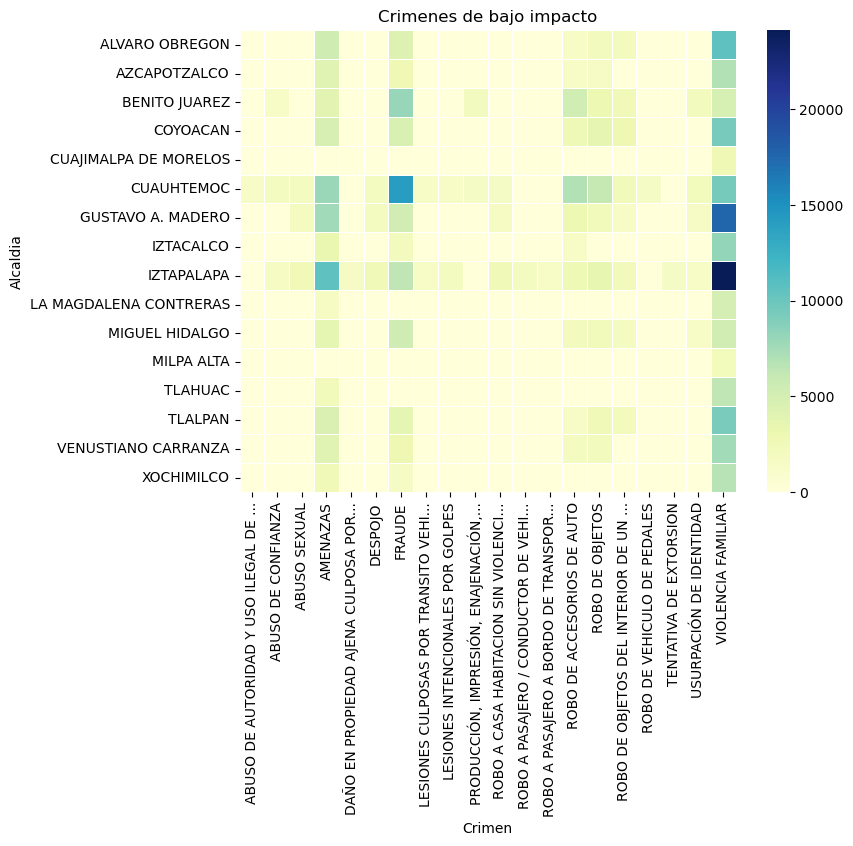

In [147]:
df_bajo_impacto = df_alcaldia[df_alcaldia['categoria']=='DELITO DE BAJO IMPACTO']
df_bajo_impacto_100= df_bajo_impacto.sort_values(by='count', ascending=False).head(100)
#df_bajo_impacto_40
heatmap_data = df_bajo_impacto_100.pivot_table(index='alcaldia_hechos', columns='delito', values='count', fill_value=0,aggfunc='sum')

heatmap(heatmap_data,'Crimenes de bajo impacto', 'Crimen','Alcaldia')


- There is an overwhelming amount of 'Violencia Familiar' crime reports in almost every alcaldia.
- There is abundance in 'Robo de transeunte en via publica con o sin violencia' and 'Robo de Vehiculo con y sin Violencia' crimes in every alcaldia
- There is a specially high amount of reported 'Violencia Familar' and 'Robo de transeunte en via publica con o sin violencia' cases in Iztapalapa
- There is an important amount of 'Robo de Vehiculo con y sin violencia' in Iztapalapa and 'Robo de Transeunte en via Publica con o sin violencia' in Cuauhtemoc
- Other crimes that had a considerable amount of reports were 'Fraude' in Cuauhtemoc, 'Amenazas' in Iztapalapa. Gustavo A. madero had its good share of *Robo de Vehiculos* and *Robo de Transeuntes con o sin violencia* 
# Alcaldia Analisis

Two alcaldias can have heatmaps to compare crime tendencies: Iztapalapa and Cuauhtemoc 

In [190]:
df_both = df_alcaldia[(df_alcaldia["alcaldia_hechos"]== 'CUAUHTEMOC') | (df_alcaldia["alcaldia_hechos"]== 'IZTAPALAPA')]

In [191]:

df_both= df_both.sort_values(by='count',ascending = False)
df_both_alto=df_both[df_both["categoria"] != 'DELITO DE BAJO IMPACTO']
df_both_bajo=df_both[df_both["categoria"] == 'DELITO DE BAJO IMPACTO']


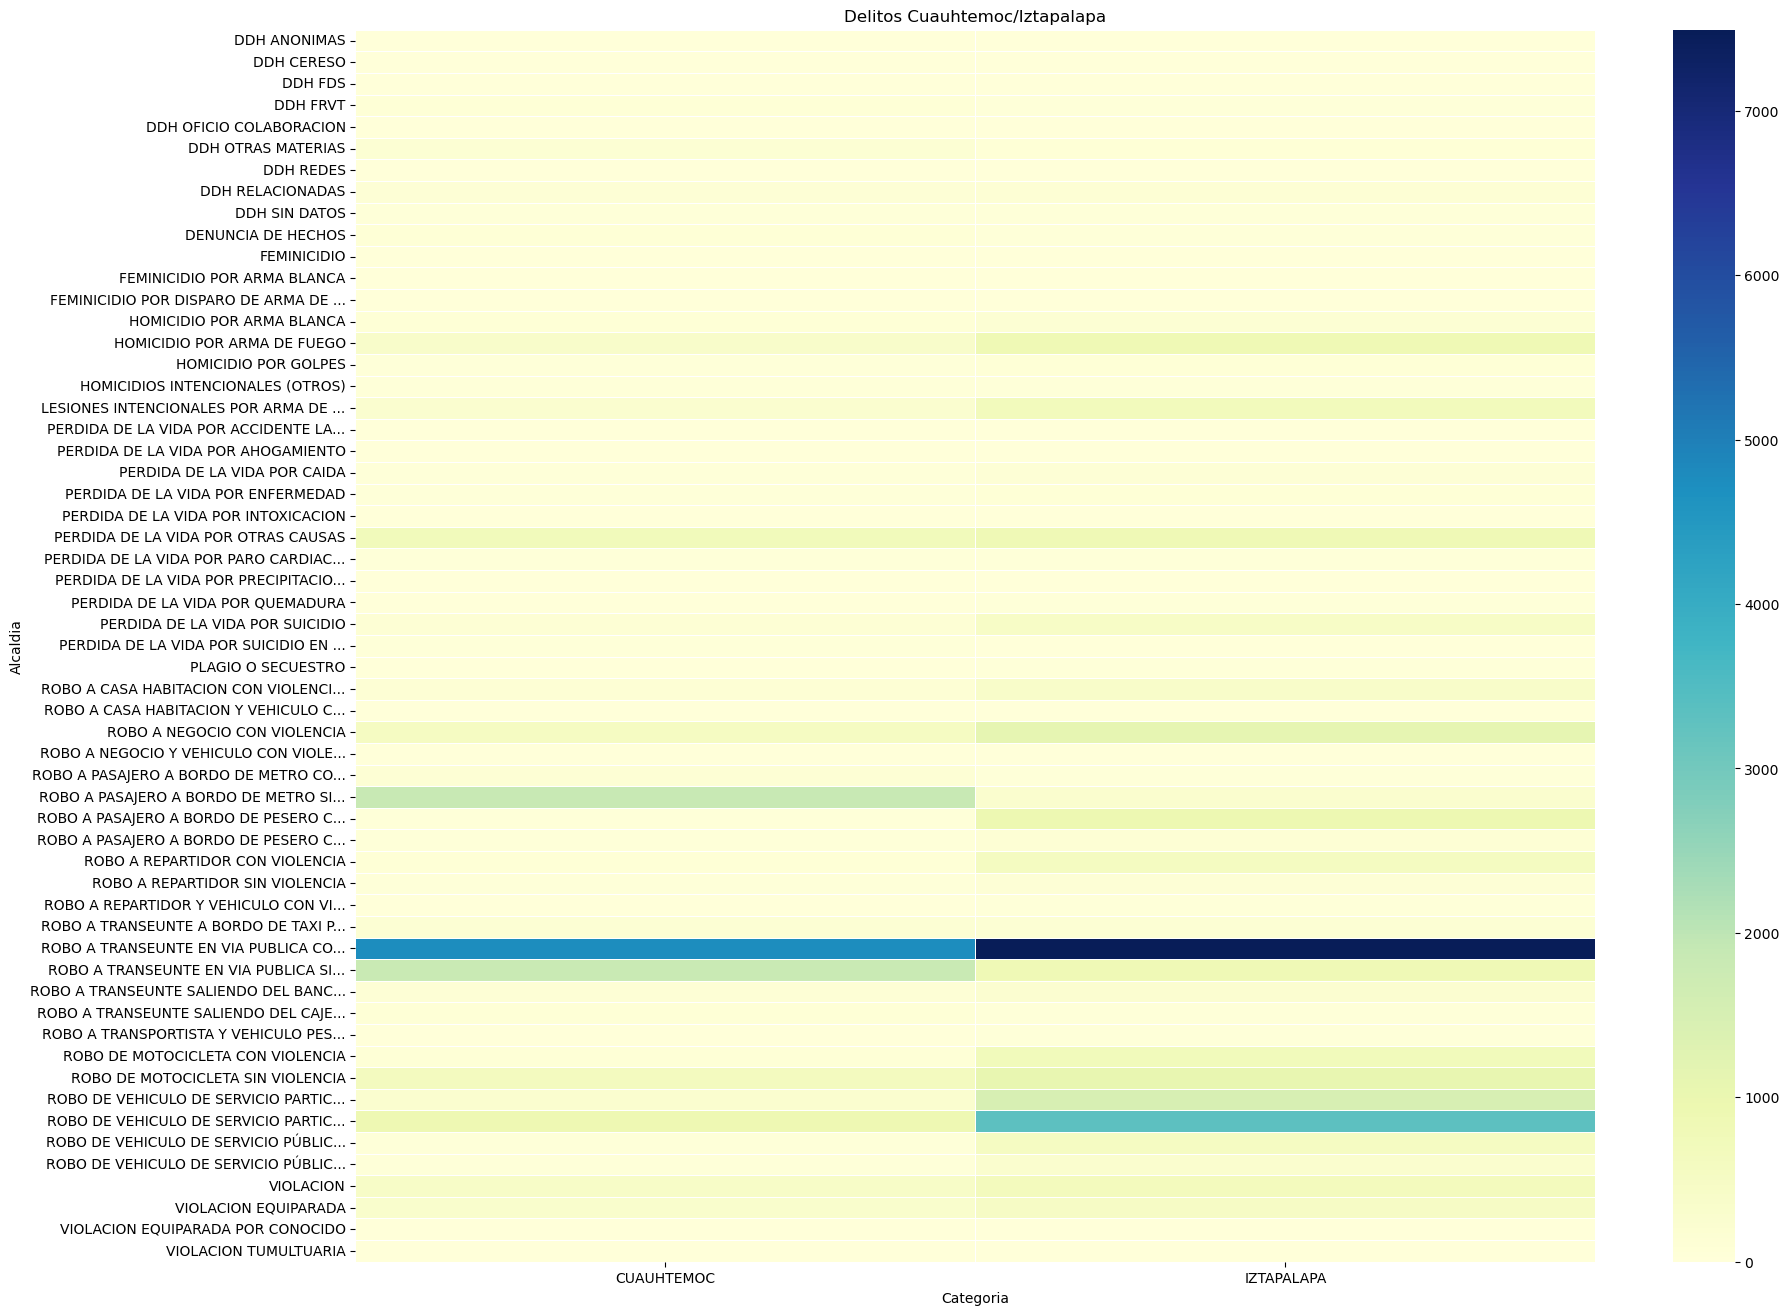

In [198]:
heatmap_data_both= df_both_alto.head(100).pivot_table(index='delito', columns='alcaldia_hechos', values='count', fill_value=0,aggfunc='sum')
heatmap(heatmap_data_both,'Delitos Cuauhtemoc/Iztapalapa', 'Categoria','Alcaldia')


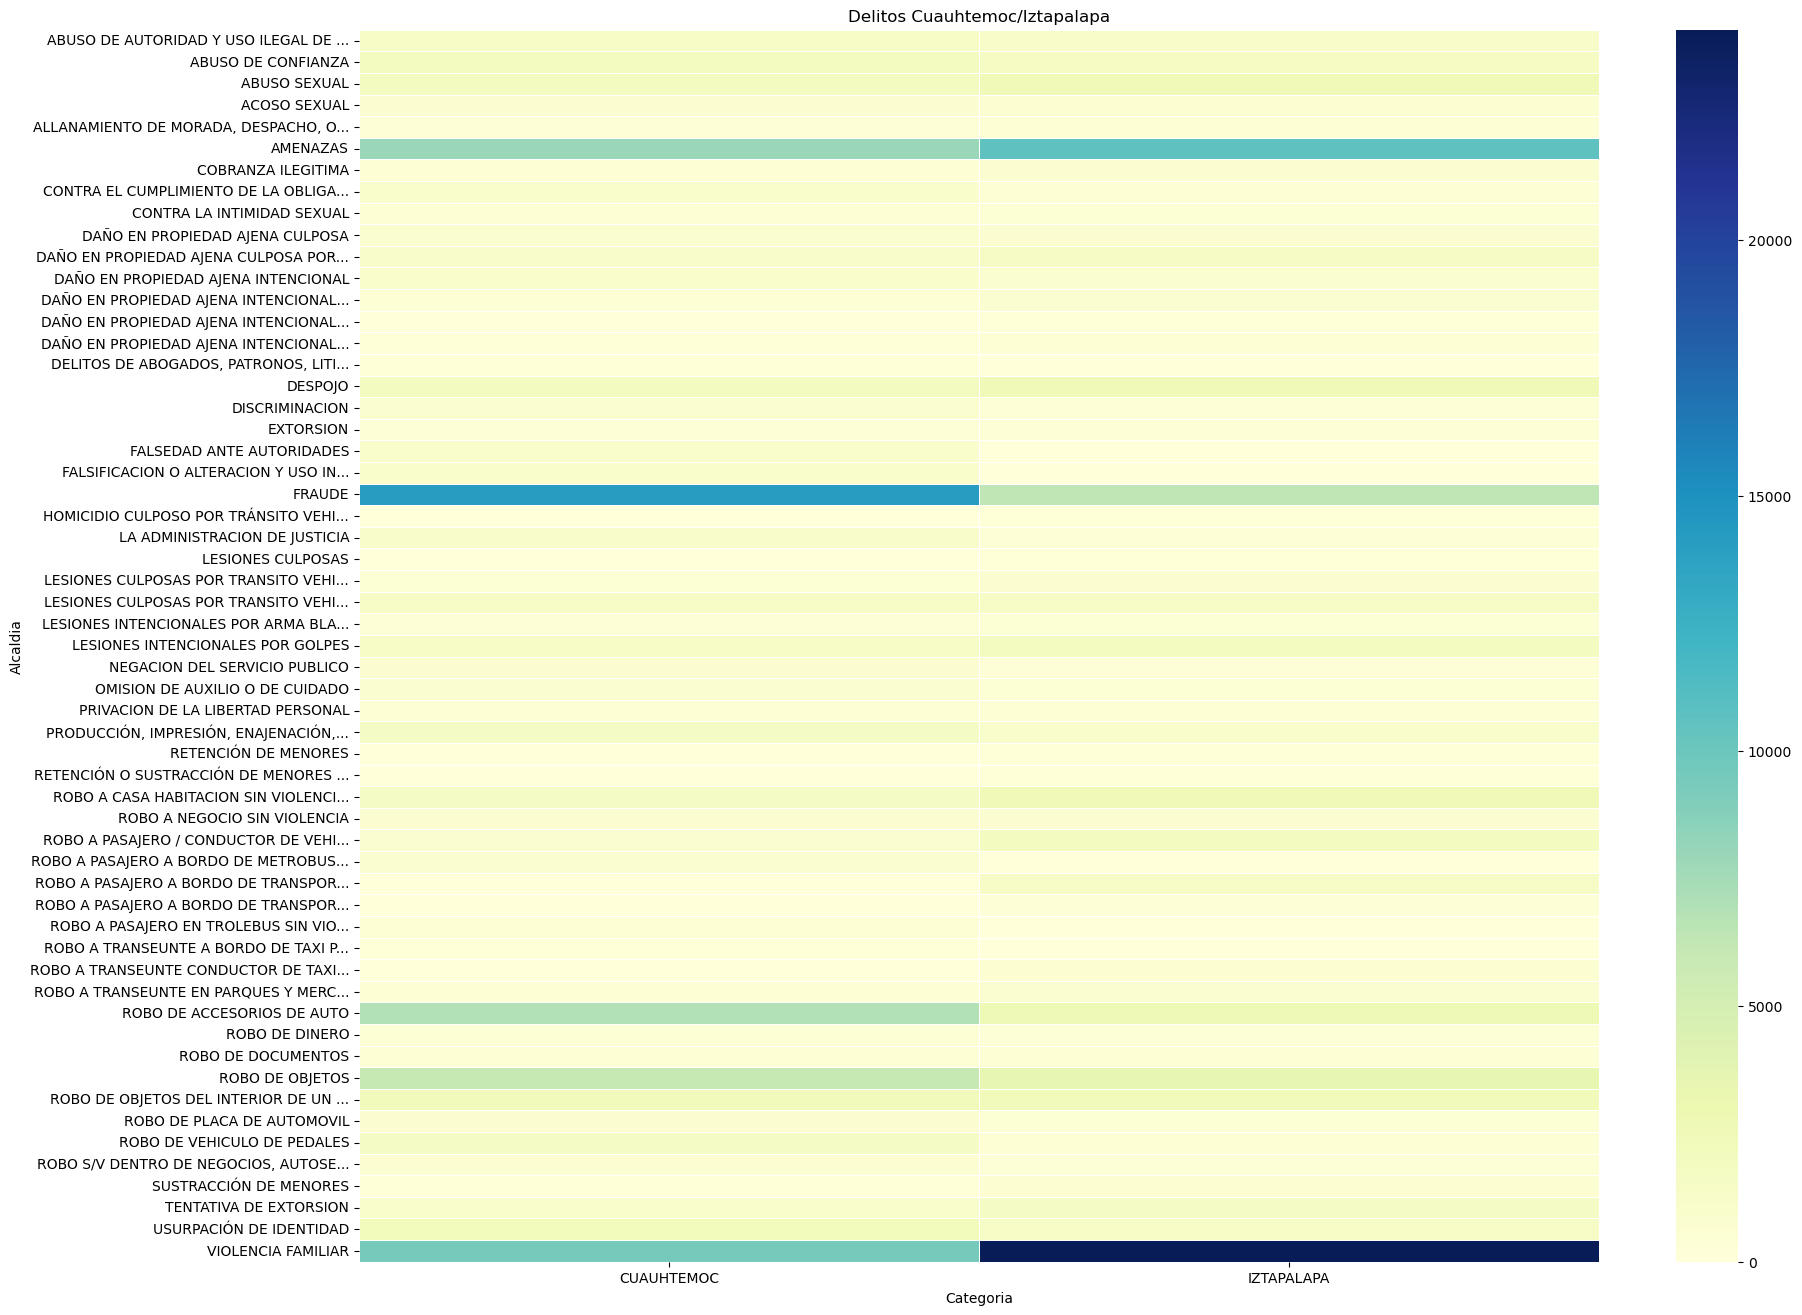

In [199]:
heatmap_data_both= df_both_bajo.head(100).pivot_table(index='delito', columns='alcaldia_hechos', values='count', fill_value=0,aggfunc='sum')
heatmap(heatmap_data_both,'Delitos Cuauhtemoc/Iztapalapa', 'Categoria','Alcaldia')
